In [2]:
import math
from datetime import date
import matplotlib.pyplot as plt
import numpy as np
from pandas_datareader import data

In [3]:
fb = data.DataReader('FB', 'yahoo', start = '5/18/2012')
fb.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-05-18,45.000000,38.000000,42.049999,38.230000,573576400,38.230000
2012-05-21,36.660000,33.000000,36.529999,34.029999,168192700,34.029999
2012-05-22,33.590000,30.940001,32.610001,31.000000,101786600,31.000000
2012-05-23,32.500000,31.360001,31.370001,32.000000,73600000,32.000000
2012-05-24,33.209999,31.770000,32.950001,33.029999,50237200,33.029999


In [4]:
# calculating number of days in time window from dataframe
elapsed_time = (fb.index[-1] - fb.index[0]).days

In [5]:
# calculating total growth of stock, from IPO date
total_growth = (fb['Adj Close'][-1] / fb['Adj Close'][1])

# annualising the elapsed time and calculating CAGR
years = elapsed_time / 365
cagr = total_growth ** (1 / years) - 1
stddev = fb['Adj Close'].pct_change().std()

# initialising trading days as 253
trading_days = 253
stddev = stddev * math.sqrt(trading_days)

print("cagr (mean): " + str(round(cagr, 4)))
print("standard deviation: " + str(round(stddev, 4)))

cagr (mean): 0.2917
standard deviation: 0.3698


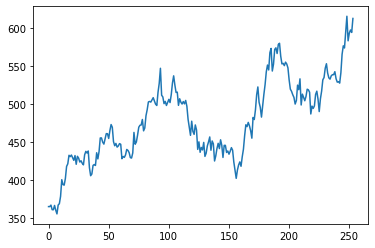

In [6]:
# generating random-walk values for 1 full year of trading (253 days) by using Numpy and normal distribution
daily_return = np.random.normal(cagr/trading_days, stddev/math.sqrt(trading_days), trading_days) + 1

price_series = [fb['Adj Close'][-1]]

for i in daily_return:
    price_series.append(price_series[-1] * i)
    
plt.plot(price_series)
plt.show()

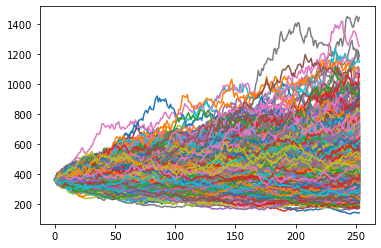

In [7]:
# initialising simulations
runs = 1000

closing_prices = []

for i in range(runs):
    daily_return = np.random.normal(cagr/trading_days, stddev/math.sqrt(trading_days), trading_days) + 1
    price_series = [fb['Adj Close'][-1]]
    
    for j in daily_return:
        price_series.append(price_series[-1] * j)
        
    closing_prices.append(price_series[-1])
    
    plt.plot(price_series)
    
plt.show()

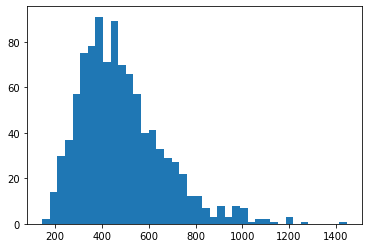

In [8]:
plt.hist(closing_prices, bins = 40)
plt.show()

In [9]:
mean_price = round(np.mean(closing_prices), 2)
print('Expected price: ', str(mean_price))

Expected price:  483.24


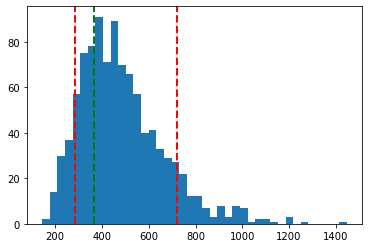

In [13]:
# look at top and bottom percentiles of possible outcomes from simulations

top10 = np.percentile(closing_prices, 100 - 10)
bot10 = np.percentile(closing_prices, 10)

plt.hist(closing_prices, bins = 40)
plt.axvline(top10, color = 'red', linestyle = 'dashed', linewidth = 2)
plt.axvline(bot10, color = 'red', linestyle = 'dashed', linewidth = 2)
plt.axvline(fb['Adj Close'][-1], color = 'green', linestyle = 'dashed', linewidth = 2)